In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [3]:
table=pd.read_csv(r"/content/iris.csv")
table.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
43,5.0,3.5,1.6,0.6,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica
126,6.2,2.8,4.8,1.8,Iris-virginica
49,5.0,3.3,1.4,0.2,Iris-setosa
143,6.8,3.2,5.9,2.3,Iris-virginica


In [4]:
table.shape

(150, 5)

# UNDERSTANDING THE DATA

In [5]:
table.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

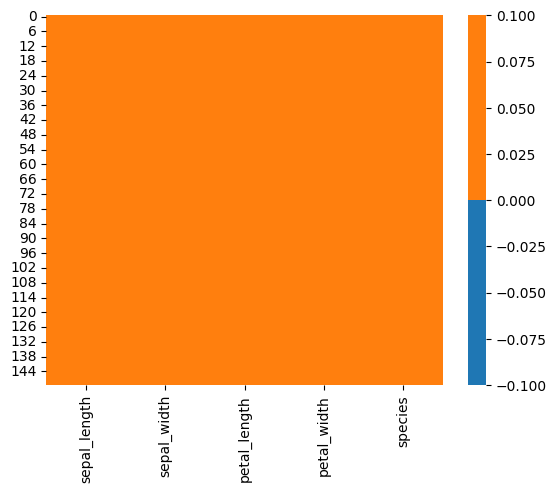

In [14]:
cols=table.columns
color=["#1f77b4","#ff7f0e"]
sns.heatmap(table[cols].isnull(),cmap=sns.color_palette(color))

In [23]:
table.groupby(["species"]).agg({"sepal_length":["mean","min","max"],"sepal_width":["mean","min","max"],"petal_length":["mean","min","max"],"petal_width":["mean","min","max"]})

sepal_length           sepal_width           petal_length  \
                        mean  min  max        mean  min  max         mean   
species                                                                     
Iris-setosa            5.006  4.3  5.8       3.418  2.3  4.4        1.464   
Iris-versicolor        5.936  4.9  7.0       2.770  2.0  3.4        4.260   
Iris-virginica         6.588  4.9  7.9       2.974  2.2  3.8        5.552   

                          petal_width            
                 min  max        mean  min  max  
species                                          
Iris-setosa      1.0  1.9       0.244  0.1  0.6  
Iris-versicolor  3.0  5.1       1.326  1.0  1.8  
Iris-virginica   4.5  6.9       2.026  1.4  2.5

In [12]:
table.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


# DATA VISUALIZATION

In [25]:
sns.set_theme(style="whitegrid")
def dist_plot(x,y):
  fig=plt.figure(figsize=(15,5))
  ax=fig.add_subplot(121)
  sns.histplot(x,ax=ax,kde=True,color="teal")
  ax.axvline(x.mean(),color="red",linestyle="-",linewidth=1.5)
  ax.axvline(x.median(),color="blue",linestyle="--",linewidth=1.5)
  ax.set_title("Kde plot")
  ax.legend(["kde","mean","median"])

  ax2=fig.add_subplot(122)
  sns.boxplot(x,ax=ax2,color="crimson")
  ax2.set_title("Boxplot")
  plt.show()

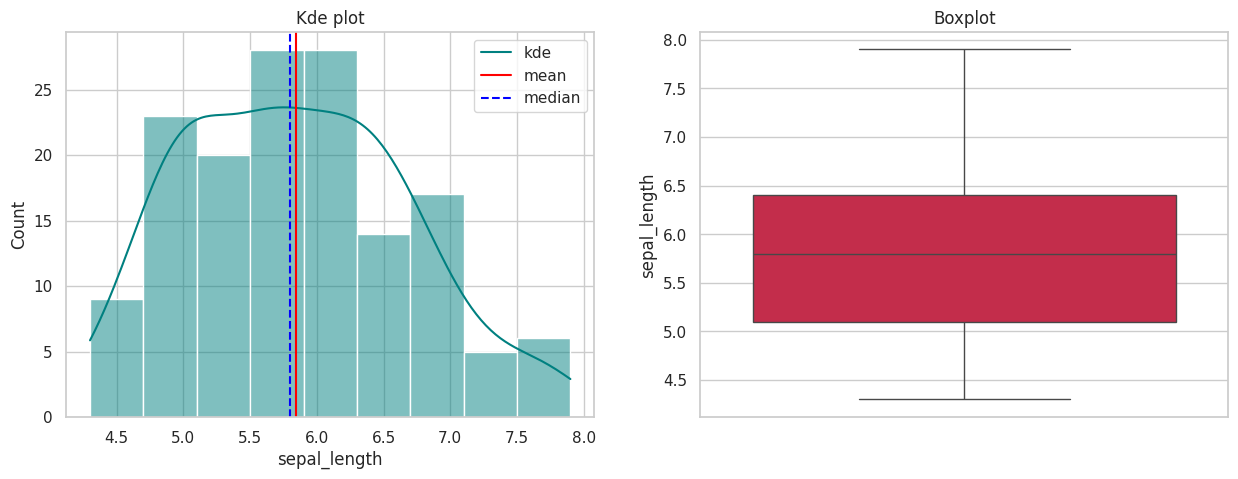

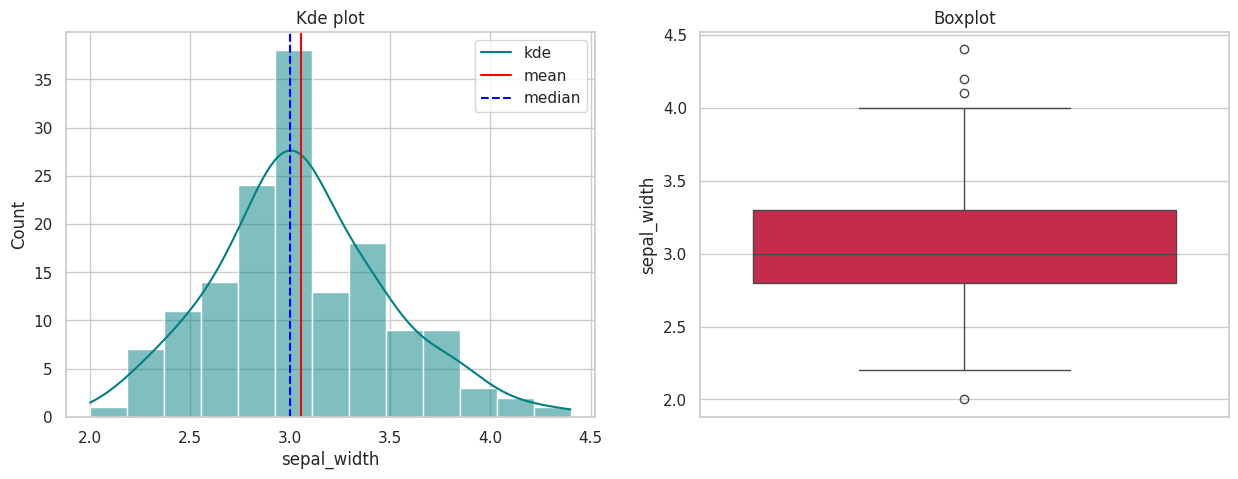

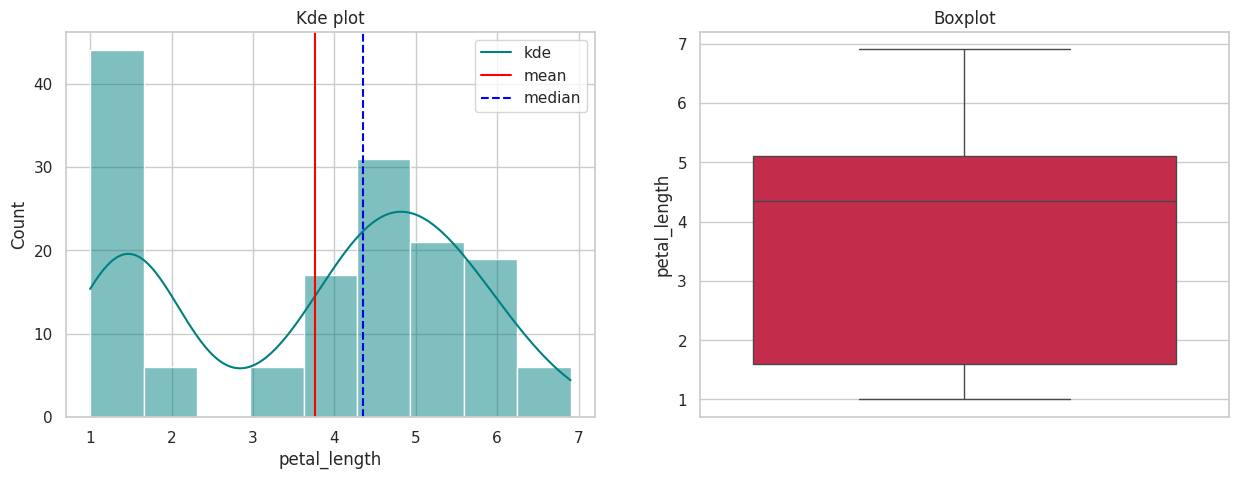

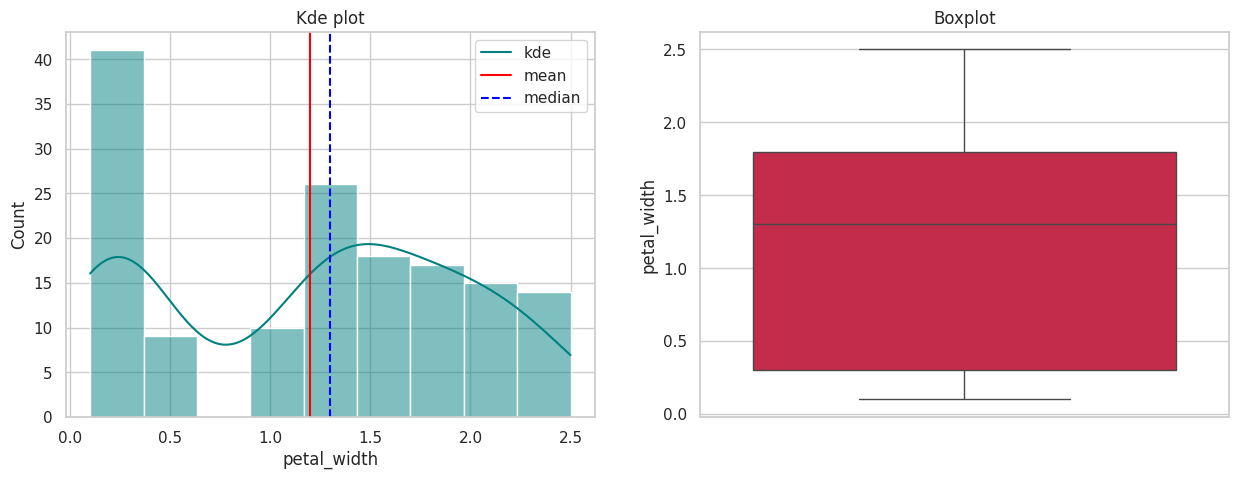

In [26]:
for i in list(table.select_dtypes(include=["number"]).columns):
  dist_plot(table[i],i)
  plt.show()

In [27]:
iris=table["species"].value_counts()
percent=round(iris/150*100,2)
percent

,count
species,
Iris-setosa,33.33
Iris-versicolor,33.33
Iris-virginica,33.33


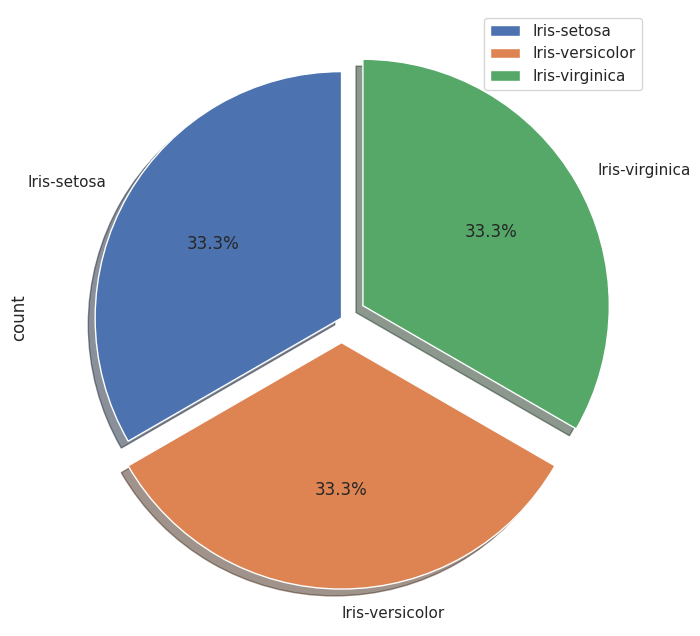

In [28]:
explode=(0,0.1,0.1)
percent.plot(figsize=(10,8),explode=explode,kind="pie",shadow=True,autopct="%1.1f%%",startangle=90,color=["brown","green","yellow"])
plt.legend(["Iris-setosa","Iris-versicolor","Iris-virginica"])
plt.show()


In [29]:
def kde_plot(x):
  sns.displot(x,kind="kde",multiple="stack",color="olive")
  plt.show()

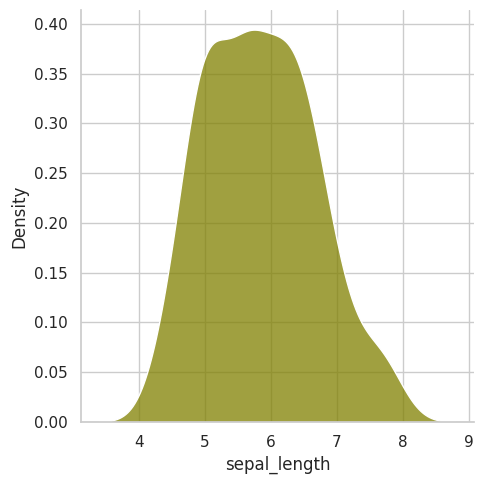

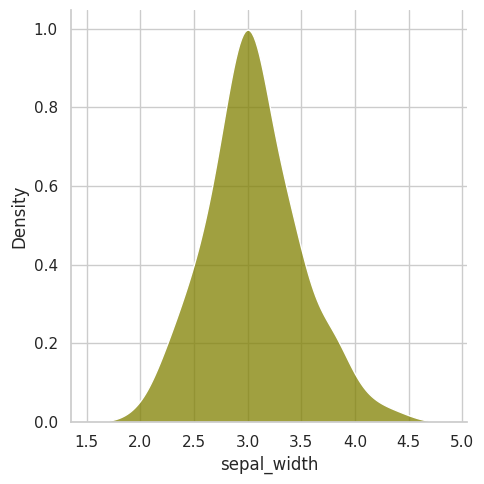

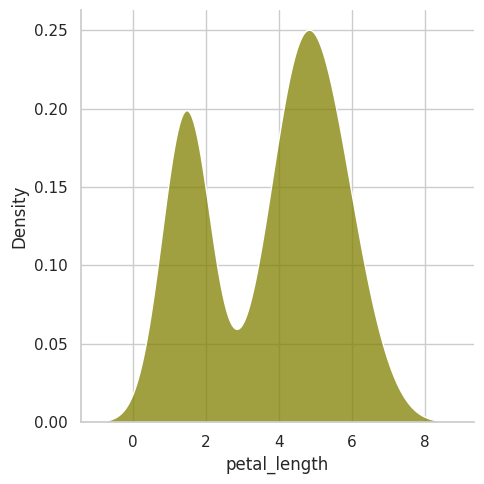

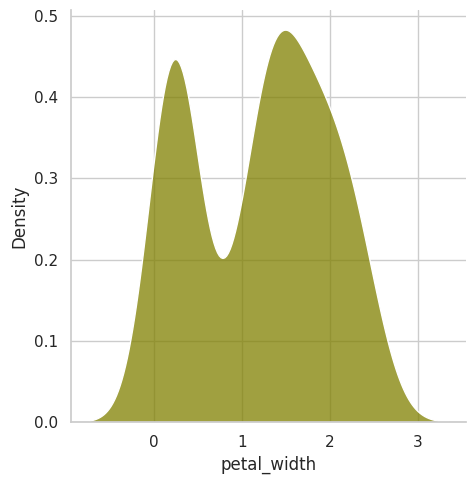

In [30]:
for i in list(table.select_dtypes(include=["number"]).columns):
  kde_plot(table[i])
  plt.show()

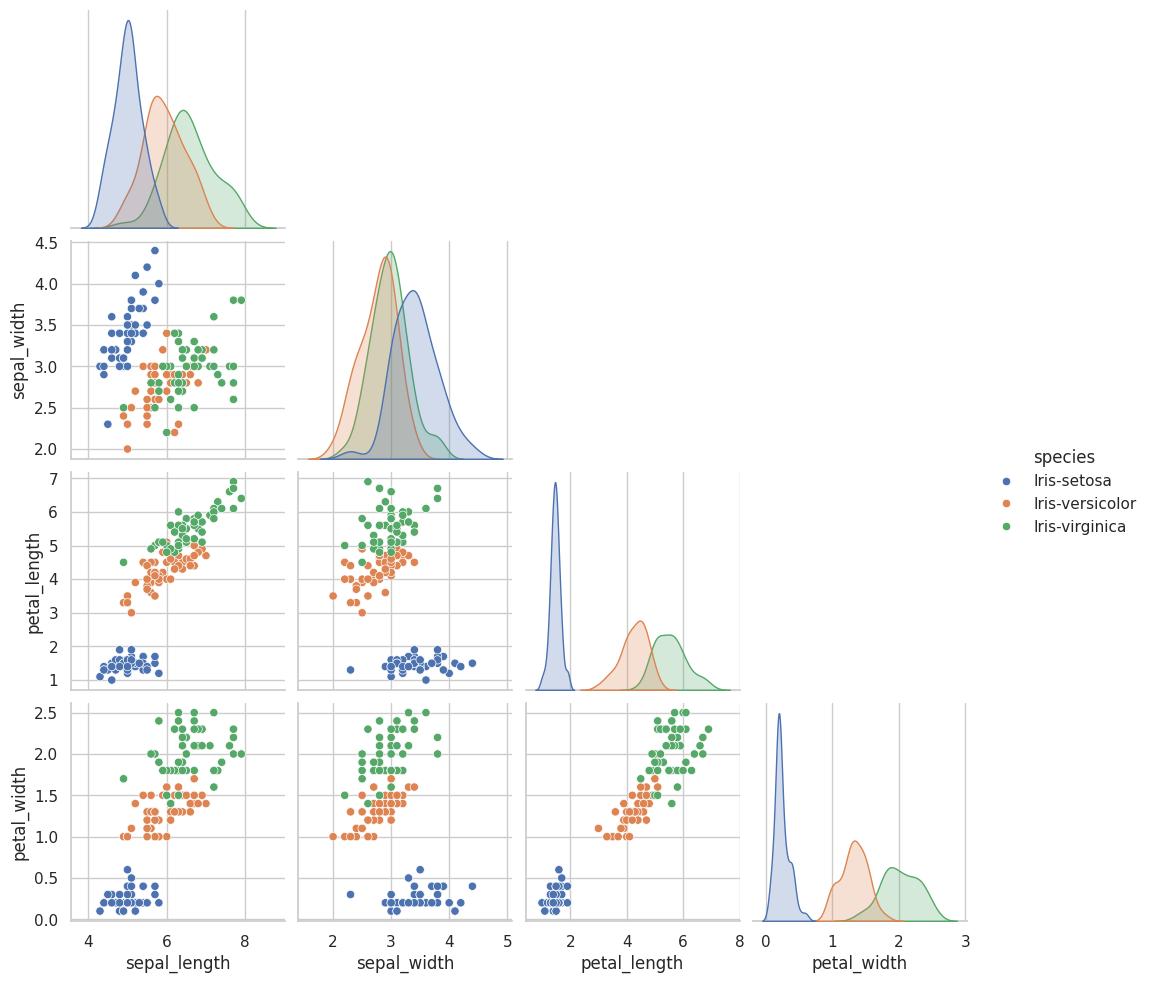

In [31]:
sns.pairplot(data=table,hue="species",corner=True)

# MODEL BUILDING

In [74]:
# Lanbel Encodeing (since Species is a nominal data , label encoder must be applied )

from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
table["species"]=lab.fit_transform(table["species"])

In [34]:
table.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
x=table.values

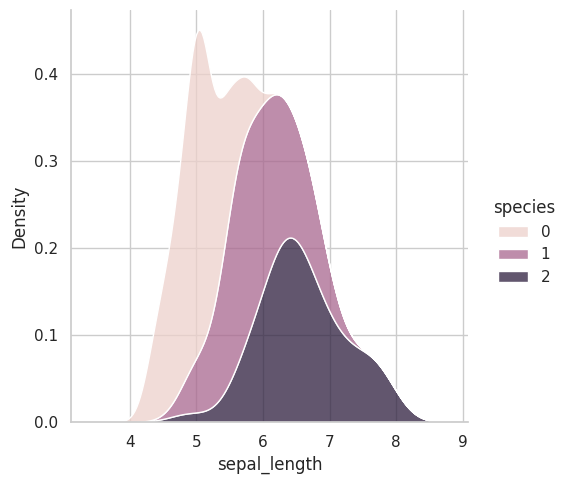

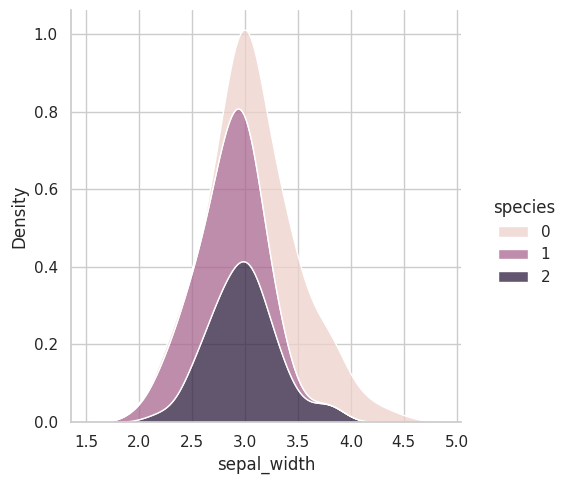

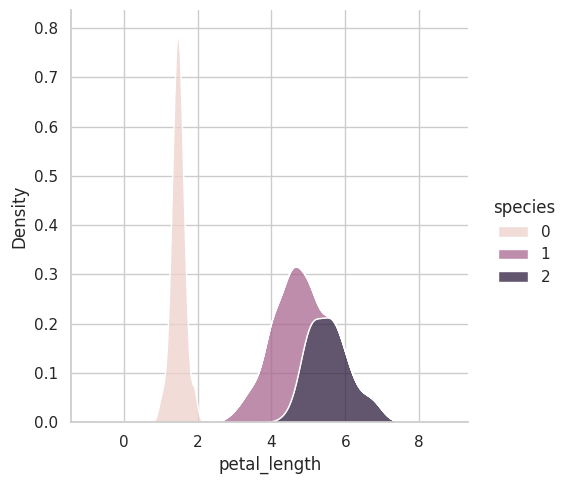

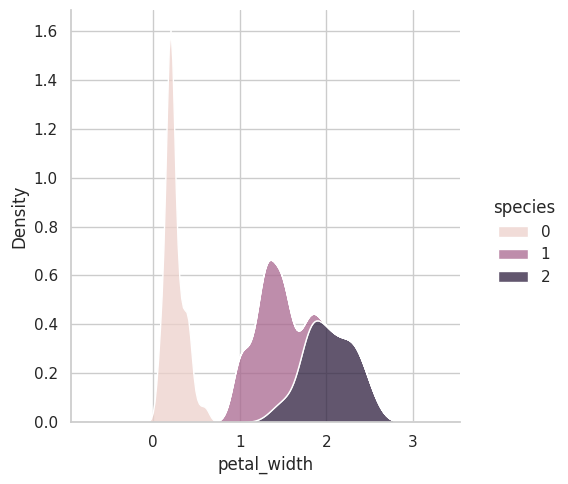

In [40]:
sns.displot(table,x="sepal_length",hue="species",kind="kde",multiple="stack")
sns.displot(table,x="sepal_width",hue="species",kind="kde",multiple="stack")
sns.displot(table,x="petal_length",hue="species",kind="kde",multiple="stack")
sns.displot(table,x="petal_width",hue="species",kind="kde",multiple="stack")

# DATA PREPROCESSING

In [41]:
# Normalizing the data

def norm_func(x):
  y=(x-x.min())/(x.max()-x.min())
  return(y)

In [42]:
table_norm=norm_func(table)
table_norm

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0
146,0.555556,0.208333,0.677966,0.750000,1.0
147,0.611111,0.416667,0.711864,0.791667,1.0
148,0.527778,0.583333,0.745763,0.916667,1.0


# KMEANS CLUSTERING MODEL

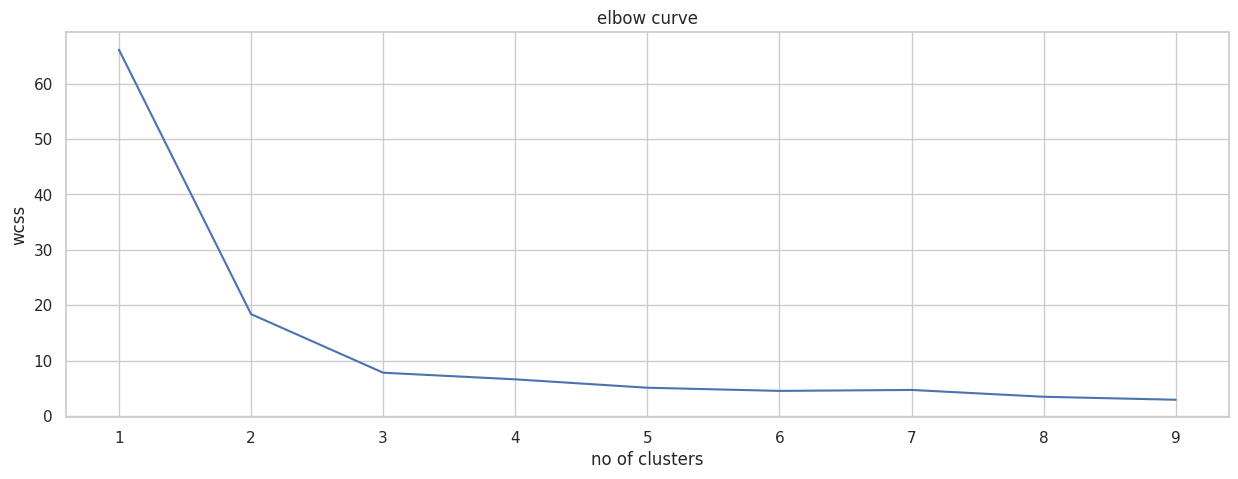

In [43]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
  clu=KMeans(n_clusters=i)
  clu.fit(table_norm)
  wcss.append(clu.inertia_)
plt.figure(figsize=(15,5))
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.title('elbow curve')
plt.plot(range(1,10),wcss)

In [44]:
clu=KMeans(n_clusters=3)
kmeans_predicted=clu.fit_predict(table_norm)
kmeans_predicted
clu.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [45]:
clu.cluster_centers_

array([[0.19611111, 0.59083333, 0.07864407, 0.06      , 0.        ],
       [0.63555556, 0.40583333, 0.77152542, 0.8025    , 1.        ],
       [0.45444444, 0.32083333, 0.55254237, 0.51083333, 0.5       ]])

In [46]:
model=pd.Series(kmeans_predicted)
table["kmeans_clusters"]=model

In [48]:
table

,sepal_length,sepal_width,petal_length,petal_width,species,kmeans_clusters
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [49]:
import sklearn
k_means=sklearn.metrics.silhouette_score(table_norm,clu.labels_)
k_means

0.6227832025859832

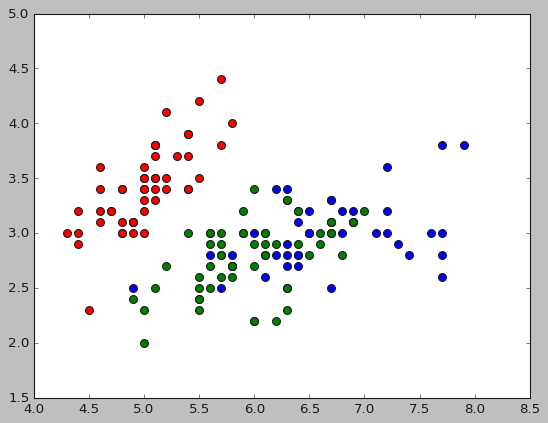

In [68]:

plt.scatter(x[kmeans_predicted == 0, 0], x[kmeans_predicted == 0, 1], s=50,c = 'red', label = 'Iris-setosa')
plt.scatter(x[kmeans_predicted == 1, 0], x[kmeans_predicted == 1, 1], s=50,c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[kmeans_predicted == 2, 0], x[kmeans_predicted== 2, 1], s=50,c = 'green', label = 'Iris-virginica')




# DBSCAN CLUSTERING MODEL

In [54]:
table2=table.copy()

In [58]:

from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=10)
nbrs=neigh.fit(table_norm)
distances,indices=nbrs.kneighbors(table_norm)

In [59]:

distances=np.sort(distances,axis=0)
distances=distances[:,1]


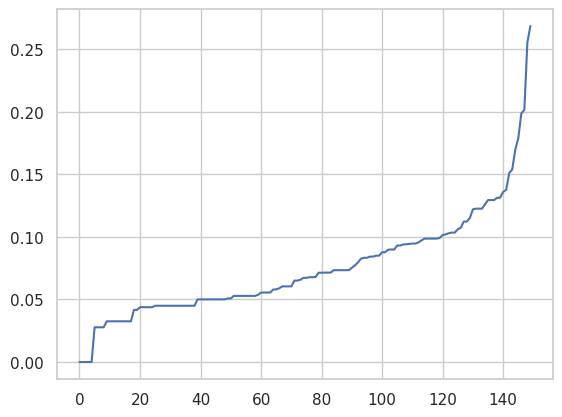

In [60]:


plt.plot(distances)


In [61]:

from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.14,min_samples=5)
dbscan.fit(table_norm)


DBSCAN(eps=0.14)

In [62]:

dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  2,  2,
        2,  2,  2, -1, -1, -1, -1, -1,  2,  2,  2,  2, -1,  2,  2, -1, -1,
       -1,  2,  2, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,  2,  2, -1, -1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2])

In [63]:

db=pd.DataFrame(dbscan.labels_,columns=["dbscan_clusters"])
table2=pd.concat([table,db],axis=1)
table2


,sepal_length,sepal_width,petal_length,petal_width,species,kmeans_clusters,dbscan_clusters
0,5.1,3.5,1.4,0.2,0,0,0
1,4.9,3.0,1.4,0.2,0,0,0
2,4.7,3.2,1.3,0.2,0,0,0
3,4.6,3.1,1.5,0.2,0,0,0
4,5.0,3.6,1.4,0.2,0,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1,2
146,6.3,2.5,5.0,1.9,2,1,2
147,6.5,3.0,5.2,2.0,2,1,2
148,6.2,3.4,5.4,2.3,2,1,2


<Axes: xlabel='sepal_width', ylabel='sepal_length'>

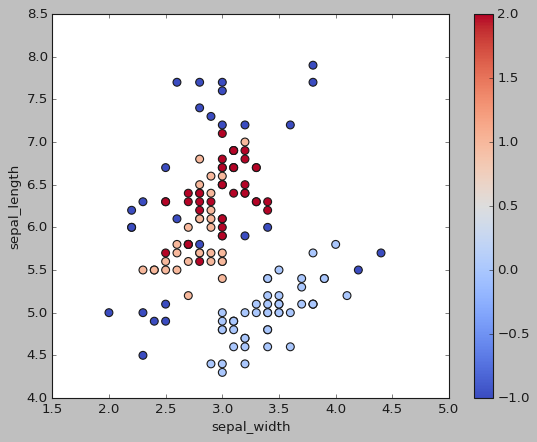

In [64]:
plt.style.use("classic")
table2.plot(x="sepal_width",y="sepal_length",c=dbscan.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm)



In [65]:

db_scan=sklearn.metrics.silhouette_score(table_norm,dbscan.labels_)
db_scan


0.45647090504711857

In [72]:
report=pd.Series({"K_means":k_means,"DBSCAN":db_scan})
report


,0
K_means,0.622783
DBSCAN,0.456471


Text(0.5, 1.0, 'COMAPRITIVE ANALYSIS')

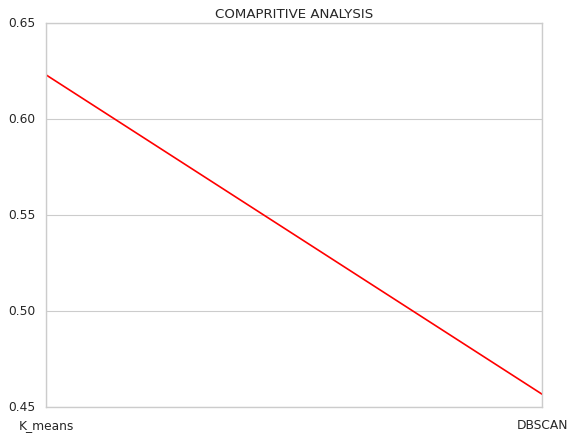

In [73]:

sns.set_theme(style="whitegrid")
plt.plot(report,color="red")
plt.title("COMAPRITIVE ANALYSIS")

# INTERPRETATIONS

> From the above silhouette score , we can conclude saying that Kmeans clustering is a better model compared to DBSCAN
> The silhouette score of KMeans clustering model is above 0.5 indicating it is a good model